## Comparison of decay pattern for different query profile sizes

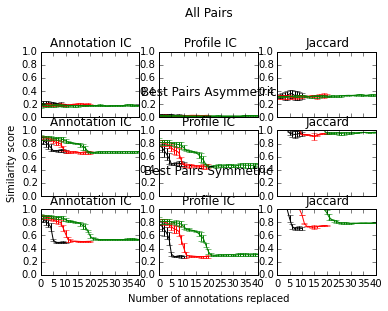

In [13]:
import matplotlib.lines as mlines
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

def error(scorelist):
	return 2*(np.std(scorelist)/math.sqrt(len(scorelist)))

def populate_score(metric,numreplaced,metricset,signalbestscores,score):
	metricset.add(metric)
	if score.strip() !="":
		if metric not in signalbestscores[numreplaced]:
			signalbestscores[numreplaced][metric]=[]
		signalbestscores[numreplaced][metric].append(float(score))
	return metricset,signalbestscores
        
    
def load_decay_results(infile):
	metricset=set()
	numreplacedset=set()
	next(infile)
	signalbestscores=dict()
	for line in infile:
		queryid,numreplaced,match_bp_sym_pic,bp_sym_pic,match_bp_sym_aic,bp_sym_aic,match_bp_asym_pic,bp_asym_pic,match_bp_asym_aic,bp_asym_aic,match_ap_pic,ap_pic,match_ap_aic,ap_aic,match_bp_asym_simj,bp_asym_simj,match_bp_sym_simj,bp_sym_simj,match_ap_simj,ap_simj=line.split("\t")
		numreplaced=int(numreplaced)
	

		if numreplaced not in signalbestscores:
			signalbestscores[numreplaced]=dict()
			numreplacedset.add(numreplaced)


		metricset,signalbestscores=populate_score("bp_sym_pic",numreplaced,metricset,signalbestscores,bp_sym_pic)
		metricset,signalbestscores=populate_score("bp_sym_aic",numreplaced,metricset,signalbestscores,bp_sym_aic)
		metricset,signalbestscores=populate_score("bp_asym_pic",numreplaced,metricset,signalbestscores,bp_asym_pic)
		metricset,signalbestscores=populate_score("bp_asym_aic",numreplaced,metricset,signalbestscores,bp_asym_aic)
		metricset,signalbestscores=populate_score("ap_pic",numreplaced,metricset,signalbestscores,ap_pic)
		metricset,signalbestscores=populate_score("ap_aic",numreplaced,metricset,signalbestscores,ap_aic)
		metricset,signalbestscores=populate_score("bp_sym_simj",numreplaced,metricset,signalbestscores,bp_sym_simj)
		metricset,signalbestscores=populate_score("bp_asym_simj",numreplaced,metricset,signalbestscores,bp_asym_simj)
		metricset,signalbestscores=populate_score("ap_simj",numreplaced,metricset,signalbestscores,ap_simj)
	return metricset,numreplacedset,signalbestscores


f, axarr = plt.subplots(3, 3)
colors=['black','red','green']
legend=[]
colorindex=0


title=dict()
title['ap_aic']="Annotation IC"
title['ap_pic']="All Pairs \n\n Profile IC"
title['ap_simj']="Jaccard"
title['bp_asym_aic']="Annotation IC"
title['bp_asym_pic']="Best Pairs Asymmetric\n\nProfile IC"
title['bp_asym_simj']="Jaccard"
title['bp_sym_aic']="Annotation IC"
title['bp_sym_pic']="Best Pairs Symmetric\n\nProfile IC"
title['bp_sym_simj']="Jaccard"
infile=open("../results/Decay/Integrated_ProfileSize10_Results.tsv")
metricset,numreplacedset,signalbestscores=load_decay_results(infile)
i=j=0
for metric in sorted(metricset):
    signallist=[]
    errorlist=[]
    for numreplaced in sorted(numreplacedset):
        signallist.append(np.mean(signalbestscores[numreplaced][metric]))
        errorlist.append(error(signalbestscores[numreplaced][metric]))
    axarr[i, j].errorbar(list(sorted(numreplacedset)),signallist,yerr=errorlist,color=colors[colorindex])
    axarr[i, j].set_title(title[metric])
    axarr[i, j].set_ylim(0,1)

    j+=1
    if j==3:
        i+=1
        j=0
    if i==3:
        i=0	



infile=open("../results/Decay/Integrated_ProfileSize20_Results.tsv")
colorindex+=1
metricset,numreplacedset,signalbestscores=load_decay_results(infile)
i=j=0
for metric in sorted(metricset):
    signallist=[]
    errorlist=[]
    for numreplaced in sorted(numreplacedset):
        signallist.append(np.mean(signalbestscores[numreplaced][metric]))
        errorlist.append(error(signalbestscores[numreplaced][metric]))
    axarr[i, j].errorbar(list(sorted(numreplacedset)),signallist,yerr=errorlist,color=colors[colorindex])
    axarr[i, j].set_title(title[metric])
    axarr[i, j].set_ylim(0,1)

    j+=1
    if j==3:
        i+=1
        j=0
    if i==3:
        i=0	



infile=open("../results/Decay/Integrated_ProfileSize40_Results.tsv")
colorindex+=1
metricset,numreplacedset,signalbestscores=load_decay_results(infile)
i=j=0
for metric in sorted(metricset):
    signallist=[]
    errorlist=[]
    for numreplaced in sorted(numreplacedset):
        signallist.append(np.mean(signalbestscores[numreplaced][metric]))
        errorlist.append(error(signalbestscores[numreplaced][metric]))
    axarr[i, j].errorbar(list(sorted(numreplacedset)),signallist,yerr=errorlist,color=colors[colorindex])
    axarr[i, j].set_title(title[metric])
    axarr[i, j].set_ylim(0,1)
    
    j+=1
    if j==3:
        i+=1
        j=0
    if i==3:
        i=0	



plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_xticklabels() for a in axarr[1, :]], visible=False)
axarr[2,1].set_xlabel('Number of annotations replaced')
axarr[1,0].set_ylabel('Similarity score')	
plt.show()
